**the essence of Machine learning and deep learning is to take some data from past .build an algorithm(like Linear regression ) to discover patterns in it and use the discovered patterns to predict class**

**to make end to end Classification mODEL With Neural Network model we will follow this workflow**

**WorkFlow**
0. **import important liberaries**
1. **Get Data Ready (turn into tensors)**
2. **Build a Model**
3. **pick a loss function and optimizer**
4. **build a training loop**
5. **evalute your model**
6. **How To improve this model**
7. **save the model**  

We begin by installing and importing torch and torchvision. torchvision contains some utilities for working with image data.

# **0.import important libraries**

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

# **1. Get Data Ready (convert in tensors ,and batches)**

In [2]:
train_dataset=datasets.FashionMNIST(root='dataset',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.FashionMNIST(root='dataset',train=False,transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 19181123.63it/s]


Extracting dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 346914.03it/s]


Extracting dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6212530.45it/s]


Extracting dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4881817.09it/s]

Extracting dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



**1.1 what is fashion mnist?**

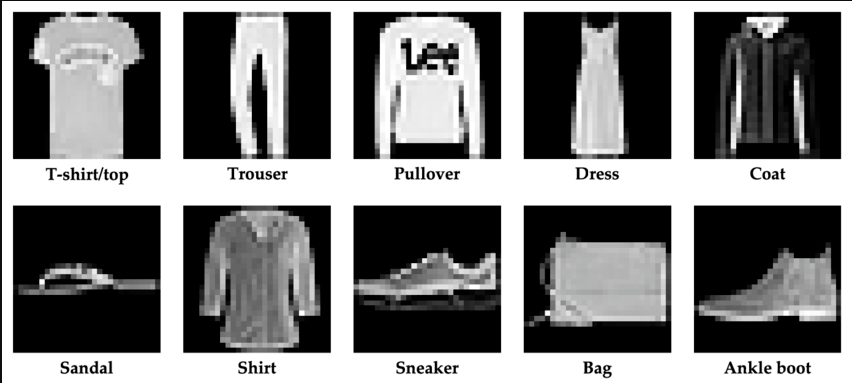

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

**1.2 what we are doing with it ?**

**we are training our model to understand the training dataset,and we want from our model that when we provide it test images he has to predict correct label**

In [3]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
len(train_dataset)

60000

In [5]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
len(test_dataset)

10000

**1.3 converting data into batches**

We'll also create a DataLoader, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

We can use the data loader in a for loop. Let's look at an example

In each iteration, the data loader returns one batch of data with the given batch size. If shuffle is set to True, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

In [7]:
batch_size=64
device= 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [9]:
len(list(train_loader))

938

In [10]:
len(list(test_loader))

157

# **2. Build NeuralNetwork Model**

In [11]:
class NeuralNetwork(nn.Module):
  def __init__(self,in_dim,n_hidden_1,n_hidden_2,out_dim):
    super().__init__()
    self.layer1=nn.Sequential(
        nn.Linear(in_dim,n_hidden_1),
        nn.ReLU(True)

    )
    self.layer2=nn.Sequential(
        nn.Linear(n_hidden_1,n_hidden_2),
        nn.ReLU(True)
    )
    self.layer3=nn.Sequential(
        nn.Linear(n_hidden_2,out_dim),
        nn.ReLU(True)
    )

  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    x=self.layer3(x)
    return x

# **nn.Sequential**
**nn.Sequential** automates the forward pass computation by sequentially processing the input data through each layer in the order they are added.

In [12]:
in_dim=28*28
n_hidden_1=300
n_hidden_2=100
out_dim=10

In [13]:
model=NeuralNetwork(in_dim,n_hidden_1,n_hidden_2,out_dim)

In [14]:
model

NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [15]:
model=model.to(device)

# **3 . Pick a loss Function**

In [16]:
learning_rate=1e-3

In [17]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

# **4 .Building a Training Loop**

In [18]:
num_epochs=20

In [19]:
for epoch in range(num_epochs):
  print('*' * 10)
  print(f'epoch{epoch+1}')
  running_loss=0.0
  running_acc=0.0
  for i,data in enumerate(train_loader,1):
    img,label=data
    img=img.view(img.size(0),-1)  #Flatten the image tensors
    img=img.to(device)
    label=label.to(device)
    out=model(img)  # Generate predictions
    loss=criterion(out,label)  # Calculate loss
    running_loss+=loss.item()
    _,pred=torch.max(out,1)
    running_acc+=(pred==label).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 300 == 0:
      print(f'epoch : {epoch+1} / {num_epochs},loss: {running_loss/i:.6f},acc: {running_acc/i:.6f}')
  print(f'Finish: {epoch + 1} epoch ,loss{ running_loss/i:.6f}.acc:{running_acc/i:.6f}')

**********
epoch1
epoch : 1 / 20,loss: 1.311678,acc: 0.525052
epoch : 1 / 20,loss: 1.208753,acc: 0.552292
epoch : 1 / 20,loss: 1.162359,acc: 0.563472
Finish: 1 epoch ,loss1.157537.acc:0.564749
**********
epoch2
epoch : 2 / 20,loss: 1.043993,acc: 0.596198
epoch : 2 / 20,loss: 1.028835,acc: 0.600781
epoch : 2 / 20,loss: 1.023475,acc: 0.601562
Finish: 2 epoch ,loss1.023487.acc:0.601546
**********
epoch3
epoch : 3 / 20,loss: 0.993738,acc: 0.610573
epoch : 3 / 20,loss: 0.997414,acc: 0.607109
epoch : 3 / 20,loss: 0.992950,acc: 0.608056
Finish: 3 epoch ,loss0.993246.acc:0.607743
**********
epoch4
epoch : 4 / 20,loss: 0.982467,acc: 0.609688
epoch : 4 / 20,loss: 0.974461,acc: 0.613229
epoch : 4 / 20,loss: 0.975438,acc: 0.612153
Finish: 4 epoch ,loss0.973099.acc:0.613006
**********
epoch5
epoch : 5 / 20,loss: 0.962359,acc: 0.613177
epoch : 5 / 20,loss: 0.963907,acc: 0.614531
epoch : 5 / 20,loss: 0.957911,acc: 0.617135
Finish: 5 epoch ,loss0.956576.acc:0.617504
**********
epoch6
epoch : 6 / 20,lo

# **5.Evaluate Your Model**

In [20]:
model.eval()
eval_loss=0.0
eval_acc=0.0
for data in train_loader:
  img,label=data
  img=img.view(img.size(0),-1)
  img=img.to(device)
  label=label.to(device)
  with torch.no_grad():
    out=model(img)
    loss=criterion(out,label)
    eval_loss+=loss.item()
    _,pred=torch.max(out,1)
    eval_acc+=(pred==label).float().mean()
print(f'Test_loss: {eval_loss/len(train_loader)},acc: {eval_acc/len(train_loader)}')

Test_loss: 0.8327899339801467,acc: 0.6547341346740723


# **5.1 visulize how model is doing**

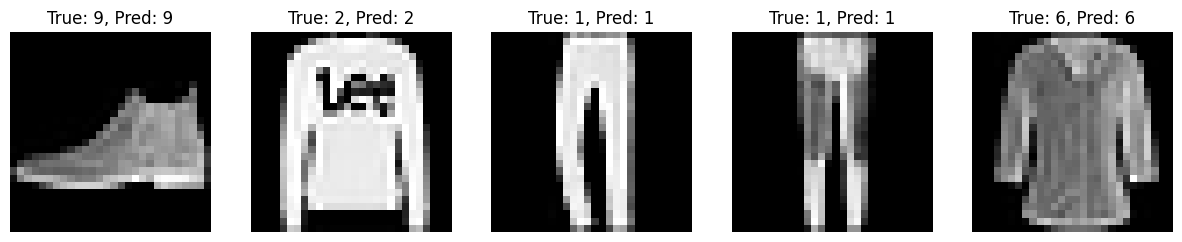

In [21]:
# Visualizing some predictions
images, labels = next(iter(test_loader))
images = images.reshape(-1, 28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
#fig is a reference to the entire figure.
#ax is an array of Axes objects, and each Axes object can be used to draw a plot. Since there are 5 subplots, ax contains 5 such objects.
#figsize=(15, 3) sets the size of the entire figure to 15 inches wide and 3 inches tall.
fig, ax = plt.subplots(1, 5, figsize=(15, 3)) #The arguments (1, 5) specify that the figure should have 1 row of 5 columns, i.e., 5 subplots aligned horizontally.
for i in range(5):
    ax[i].imshow(images[i].reshape(28, 28).cpu(), cmap='gray')
    ax[i].set_title(f'True: {labels[i].item()}, Pred: {predicted[i].item()}')
    ax[i].axis('off')
plt.show()

# **6.How to Improve this model?**

**Improving a model (from a model perspective)**

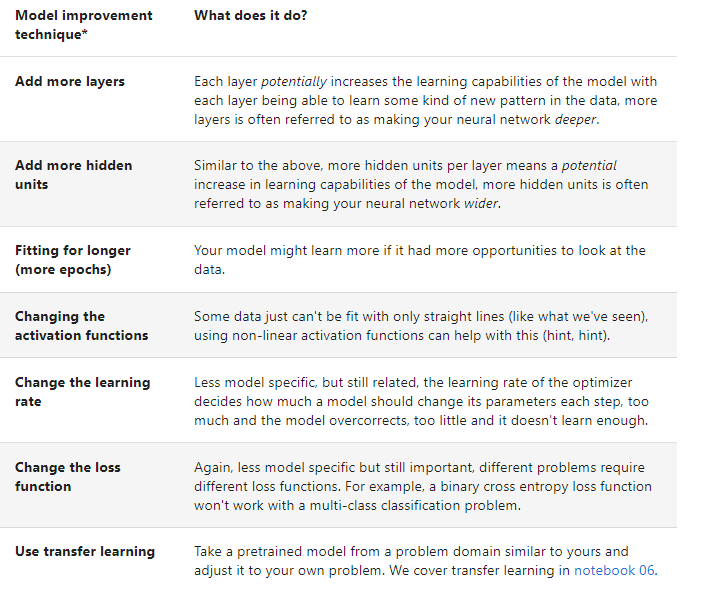

*because you can adjust all of these by hand, they're referred to as hyperparameters.

# **7.Save The Model**

**it is recomended to save state_dict()**

In [22]:
model.state_dict()

OrderedDict([('layer1.0.weight',
              tensor([[ 0.5016,  0.2446,  0.4128,  ..., -0.2474, -0.0696,  0.1523],
                      [ 0.0695, -0.2771, -0.1987,  ...,  0.0786,  0.1703,  0.1406],
                      [ 0.0115, -0.0277, -0.0311,  ..., -0.0329, -0.0200, -0.0038],
                      ...,
                      [ 0.0242,  0.1516, -0.1083,  ...,  0.1267,  0.6194,  0.0220],
                      [-0.0115,  0.1555,  0.0988,  ..., -0.0574,  0.0266, -0.0094],
                      [ 0.2501,  0.0482,  0.1272,  ...,  0.1698,  0.3920,  0.2851]])),
             ('layer1.0.bias',
              tensor([ 2.4353e-01, -2.1002e-01,  2.4243e-02,  4.3014e-01,  1.5236e-01,
                       2.1346e-01, -6.9028e-02,  1.5457e-01,  3.7095e-01,  1.0375e-01,
                      -3.3677e-02,  2.2313e-01, -2.6672e-01,  2.6560e-01,  4.3822e-01,
                       2.9684e-01,  4.6435e-01,  2.4137e-01,  5.4816e-01, -2.9635e-01,
                       1.5633e-02,  6.2936e-02,  4.520

To save the model, it's recommended to use the **state_dict()** method, which returns a dictionary containing learned parameters like weights and biases. This dictionary represents the model's state but not the entire model architecture.

In [23]:
torch.save(model.state_dict(),'./NeuralNetwork.pth')

Here's what each part of the torch.save() function does:

1. Specify what you want to save using model.state_dict(), which captures the learned parameters.
2. Indicate where you want to save the state dictionary by providing a file path, such as ./linearRegression.pth. This file will store the model's learned parameters for future use.